In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Summary

A data frame with 462 observations on the following 10 variables.

sbp - systolic blood pressure

tobacco - cumulative tobacco (kg)

ldl - low density lipoprotein cholesterol

adiposity - a numeric vector

famhist - family history of heart disease, a factor with levels "Absent" and "Present"

typea - type-A behavior

obesity - a numeric vector

alcohol - current alcohol consumption

age - age at onset

chd - response, coronary heart disease

Source: https://www.kaggle.com/datasets/yassinehamdaoui1/cardiovascular-disease

# Load Data

In [4]:
df = pd.read_csv('/content/cardiovascular.txt', delimiter=';')
df.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# Data Processing

'ind' column can be dropped as it is nothing more than an individual identifier.

In [5]:
df.drop('ind', axis=1, inplace=True)

Let's see if there are any missing values

In [6]:
df.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

Doesn't look like there are any blank cells, let's convert the only non-numeric column (famhist) to numeric values.

In [7]:
df['famhist'].replace({'Present' : 1, 'Absent' : 0}, inplace=True)

In [8]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [9]:
df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

# Data Visualization

Let's do a simple visualisation 

In [10]:
def visualization(col):
  chd_yes = df[df.chd == 1][col]
  chd_no = df[df.chd == 0][col]
  plt.hist([chd_yes, chd_no], color=['red','green'], label=['chd', 'no chd'])
  plt.legend()
  plt.xlabel(col)
  plt.ylabel('Number of Patients')
  plt.title('Patient chd Status Based on ' + col)
  return plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


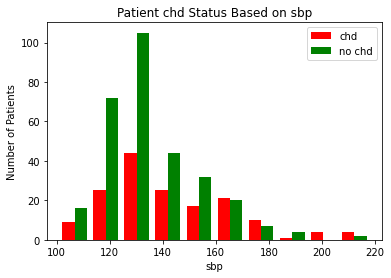

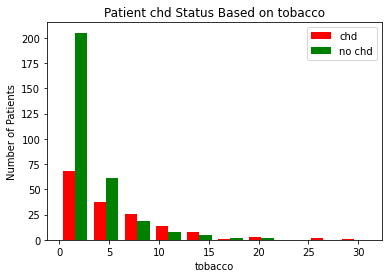

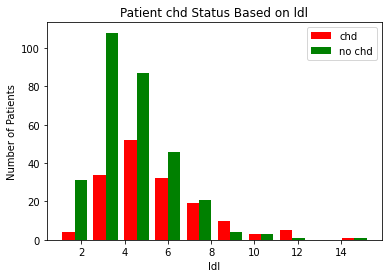

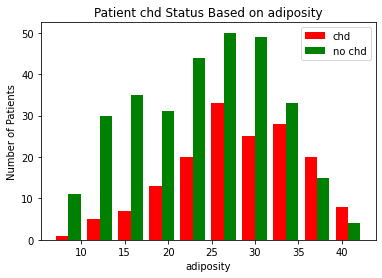

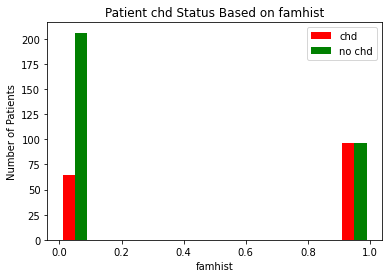

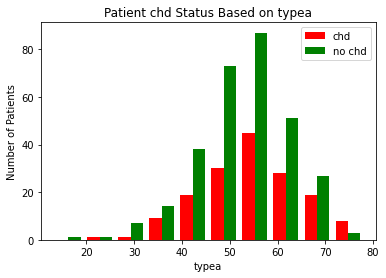

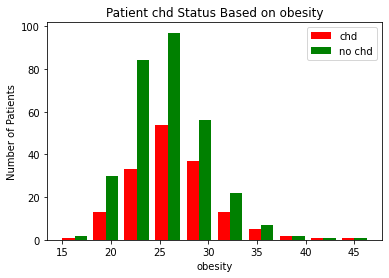

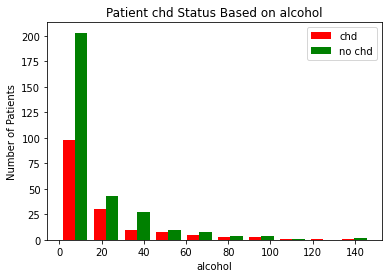

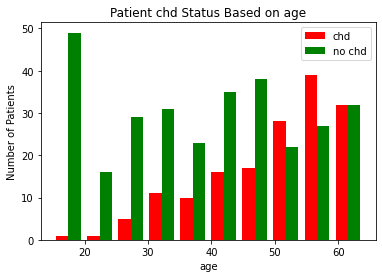

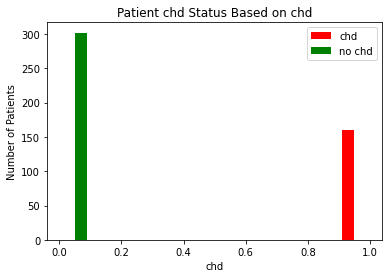

In [11]:
for column in df.columns:
  visualization(column)

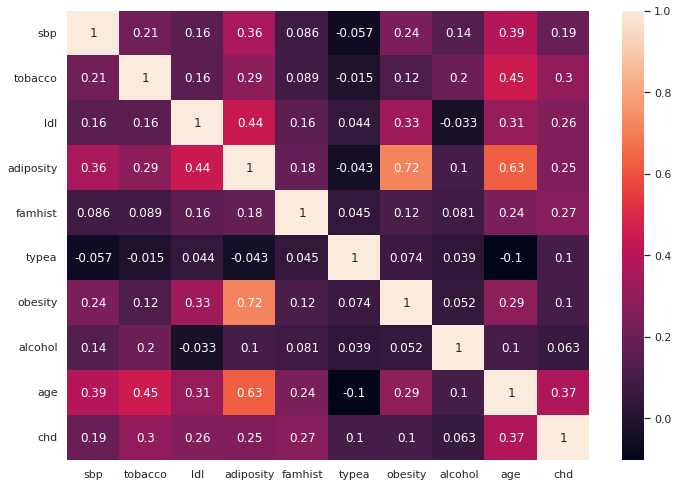

In [12]:
corr = df.corr()

import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True)

Taking a look at the correlation between variables and the outcome, we see that alcohol consumption has an extremely low correlation with chd onset (0.063). It may be beneficial to remove alcohol as a variable.

In [13]:
df.drop('alcohol', axis=1, inplace=True)

In [14]:
df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

# Data Preparation


Firstly, let's scale the data:

In [15]:
cols_to_scale = ['sbp', 'tobacco', 'ldl', 'adiposity', 
                 'typea', 'obesity', 'age']
                 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [16]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,age,chd
0,0.504274,0.384615,0.331010,0.457902,1,0.553846,0.332497,0.755102,1
1,0.367521,0.000321,0.239024,0.611748,0,0.646154,0.444479,0.979592,1
2,0.145299,0.002564,0.174216,0.714406,1,0.600000,0.452949,0.632653,0
3,0.589744,0.240385,0.378397,0.875245,1,0.584615,0.542346,0.877551,1
4,0.282051,0.435897,0.175610,0.588531,1,0.723077,0.354141,0.693878,1


Now that we can see certain trends and all the data is numeric, it's time to prepare the data for entry into a model.

The data is not regularised, let's try using SMOTE to regularise it.

In [17]:
X = df.drop('chd', axis=1)
y = df.chd

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X, y)

In [20]:
y_sm.value_counts()

1    302
0    302
Name: chd, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm)

In [22]:
X_train.shape

(483, 8)

In [23]:
X_test.shape

(121, 8)

In [24]:
y_train.value_counts()

0    242
1    241
Name: chd, dtype: int64

In [25]:
y_test.value_counts()

1    61
0    60
Name: chd, dtype: int64

Everything seems nicely regularised and split, let's begin with a model creation!

# Machine Learning Model Creation


The machine learning models I will use are:


*   Linear Regression
*   Random Forest
*   Decision Tree
*   Lasso

In [26]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
algos = {
    'linear regression' : {
        'model' : LinearRegression(),
        'params' : {
            'fit_intercept' : [True, False]
        }
    },
    'lasso' : {
        'model' : Lasso(),
        'params' : {
            'fit_intercept' : [True, False],
            'precompute' : [True, False, 'auto']
        }
    },
    'DecisionTree':{
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'splitter' : ['best', 'random']
        }
    },
    'RandomForest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10, 25, 50, 100, 200],
            'criterion' : ['gini', 'entropy'],
        }
    }
}

In [28]:
def GridSearchCV_chd(x, y):
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(x,y)
    scores.append({
        'model' : algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })
  
  grid_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
  return grid_df

In [29]:
GridSearchCV_chd(X_sm, y_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 917, in fit
    % self.precompute
ValueError: precompute should be one of True, False or array-like. Got 'auto'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/

,model,best_score,best_params
0,linear regression,0.216494,{'fit_intercept': True}
1,lasso,-0.017404,"{'fit_intercept': True, 'precompute': True}"
2,DecisionTree,0.689256,"{'criterion': 'entropy', 'splitter': 'random'}"
3,RandomForest,0.766942,"{'criterion': 'gini', 'n_estimators': 200}"


Random Forest looks to be the best, let's dive further in with it

In [30]:
rf_model = RandomForestClassifier(criterion='gini', n_estimators=25)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [31]:
rf_model.score(X_test, y_test)

0.7272727272727273

In [32]:
rf_model.predict_proba(X_test[:5])

array([[0.92, 0.08],
       [0.68, 0.32],
       [0.72, 0.28],
       [0.04, 0.96],
       [0.04, 0.96]])

In [33]:
y_preds = rf_model.predict(X_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        60
           1       0.75      0.69      0.72        61

    accuracy                           0.73       121
   macro avg       0.73      0.73      0.73       121
weighted avg       0.73      0.73      0.73       121



73% accuracy seems good, but can a neural network achieve better?

# Neural Network

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
X.shape

(462, 8)

In [36]:
ann = keras.Sequential([
          keras.layers.Dense(8, input_shape=(8,), activation='relu'),
          keras.layers.Dense(4, activation='relu'),
          keras.layers.Dense(1, activation='sigmoid')
])

ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [37]:
ann.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 4s 5ms/step - loss: 0.7381 - accuracy: 0.5114
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5135
Epoch 3/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.5569
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.6335
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6335
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.6605
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.6729
Epoch 8/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.6353 - accuracy: 0.6791
Epoch 9/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.6832
Epoch 10/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6280 - accuracy: 0.6812

In [38]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.4983 - accuracy: 0.7769


[0.49830758571624756, 0.7768595218658447]

In [39]:
y_preds_ann = ann.predict(X_test)
y_preds_ann = np.round(y_preds_ann)
    
print("Classification Report: \n", classification_report(y_test, y_preds_ann))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        60
           1       0.83      0.70      0.76        61

    accuracy                           0.78       121
   macro avg       0.78      0.78      0.78       121
weighted avg       0.78      0.78      0.78       121



An ANN performs *slightly* better than a random forest, but is it really worth the extra computational stress?